In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('C:/Users/lucas/Google Drive/Ferz - Kilbel/datawarehouse/ventas20200925.csv')

In [5]:
sales.columns=['id', 'datetime', 'product', 'client', 'store', 'pos', 'qty', 'price']
sales['datetime'] = pd.to_datetime(sales['datetime'])
sales.drop(columns='pos', inplace=True)
sales.set_index('datetime')
sales.reset_index()
sales.head()

,id,datetime,product,client,store,qty,price
0,17461441,2020-09-01 08:06:43,24710,45495,12,1.0,65.90
1,17461441,2020-09-01 08:06:43,29425,45495,12,3.0,801.00
2,17461441,2020-09-01 08:06:43,30947,45495,12,1.0,149.00
3,17461441,2020-09-01 08:06:43,33625,45495,12,1.0,65.90
4,17461441,2020-09-01 08:06:43,35588,45495,12,1.0,124.99


In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651870 entries, 0 to 1665267
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   id         1651870 non-null  int64         
 1   datetime   1651870 non-null  datetime64[ns]
 2   product    1651870 non-null  object        
 3   client     1651870 non-null  object        
 4   store      1651870 non-null  object        
 5   qty        1651870 non-null  float64       
 6   price      1651870 non-null  float64       
 7   year       1651870 non-null  int64         
 8   month      1651870 non-null  int64         
 9   day        1651870 non-null  int64         
 10  dayofweek  1651870 non-null  int64         
 11  hour       1651870 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 144.9+ MB


In [7]:
sales['product'] = sales['product'].astype('object')
sales['store'] = sales['store'].astype('object')

In [9]:
sales['year'] = sales['datetime'].dt.year
sales['month'] = sales['datetime'].dt.month
sales['day'] = sales['datetime'].dt.day
sales['dayofweek'] = sales['datetime'].dt.dayofweek
sales['hour'] = sales['datetime'].dt.hour

sales

,id,datetime,product,client,store,qty,price,year,month,day,dayofweek,hour
0,17461441,2020-09-01 08:06:43,24710,45495,12,1.0,65.90,2020,9,1,1,8
1,17461441,2020-09-01 08:06:43,29425,45495,12,3.0,801.00,2020,9,1,1,8
2,17461441,2020-09-01 08:06:43,30947,45495,12,1.0,149.00,2020,9,1,1,8
3,17461441,2020-09-01 08:06:43,33625,45495,12,1.0,65.90,2020,9,1,1,8
4,17461441,2020-09-01 08:06:43,35588,45495,12,1.0,124.99,2020,9,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1665264,17627934,2020-09-26 17:10:14,33374,10223,11,1.0,49.00,2020,9,26,5,17
1665265,17627934,2020-09-26 17:10:14,34191,10223,11,1.0,40.92,2020,9,26,5,17
1665266,17627934,2020-09-26 17:10:14,37126,10223,11,1.0,69.68,2020,9,26,5,17
1665267,17627934,2020-09-26 17:10:14,38704,10223,11,1.0,51.40,2020,9,26,5,17


In [10]:
sales.describe()

,id,qty,price,year,month,day,dayofweek,hour
count,1.665269e+06,1.665269e+06,1.665269e+06,1665269.0,1665269.0,1.665269e+06,1.665269e+06,1.665269e+06
mean,1.754347e+07,1.201833e+00,1.249303e+02,2020.0,9.0,1.317652e+01,2.997406e+00,1.405808e+01
std,4.832508e+04,1.087639e+00,1.215071e+02,0.0,0.0,7.524043e+00,1.755180e+00,3.405283e+00
min,1.746144e+07,-9.000000e+01,-5.868450e+03,2020.0,9.0,1.000000e+00,0.000000e+00,6.000000e+00
25%,1.750113e+07,1.000000e+00,5.985000e+01,2020.0,9.0,7.000000e+00,2.000000e+00,1.100000e+01
50%,1.754205e+07,1.000000e+00,9.150000e+01,2020.0,9.0,1.300000e+01,3.000000e+00,1.400000e+01
75%,1.758462e+07,1.000000e+00,1.461700e+02,2020.0,9.0,1.900000e+01,5.000000e+00,1.700000e+01
max,1.762793e+07,1.090000e+02,6.036120e+03,2020.0,9.0,2.600000e+01,6.000000e+00,2.000000e+01


In [11]:
sales = sales[sales['qty']!=0]

In [ ]:
sales.head(10)

<AxesSubplot:xlabel='hour'>

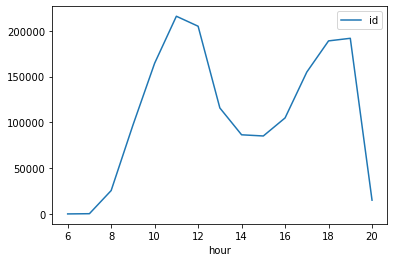

In [12]:
# Esto primero no hace falta, ya que el count toma valores únicos
# df1 = sales.loc[:,['id','hour']]
# df1 = df1.groupby('hour').agg({'id':'count'})
df1 = sales.groupby('hour').agg({'id':'count'})
df1.plot()

<AxesSubplot:xlabel='dayofweek'>

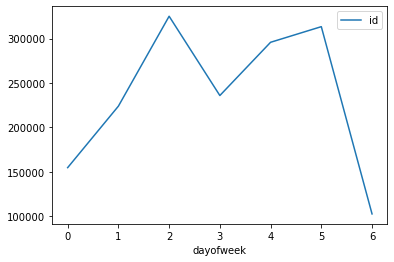

In [13]:
df2 = sales.groupby('dayofweek').agg({'id':'count'})
df2.plot()

<AxesSubplot:xlabel='day'>

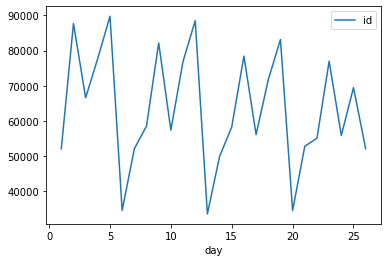

In [15]:
df4 = sales.groupby('day').agg({'id':'count'})
df4.plot()

In [16]:
df_product = sales[sales['id'].duplicated(keep=False)]
df_product.head()

,id,datetime,product,client,store,qty,price,year,month,day,dayofweek,hour
0,17461441,2020-09-01 08:06:43,24710,45495,12,1.0,65.90,2020,9,1,1,8
1,17461441,2020-09-01 08:06:43,29425,45495,12,3.0,801.00,2020,9,1,1,8
2,17461441,2020-09-01 08:06:43,30947,45495,12,1.0,149.00,2020,9,1,1,8
3,17461441,2020-09-01 08:06:43,33625,45495,12,1.0,65.90,2020,9,1,1,8
4,17461441,2020-09-01 08:06:43,35588,45495,12,1.0,124.99,2020,9,1,1,8


In [20]:
 df_product.groupby('id')['product'].apply(str).head()

0          24710
1          29425
2          30947
3          33625
4          35588
           ...  
1665257      292
1665258     1037
1665259     3167
1665260     4581
1665261    21655
Name: product, Length: 666893, dtype: object

In [43]:
productos = sales['product'].copy()
sales['product'] = productos.astype('str').apply(lambda x: 'P' .join(x))

<ipython-input-43-d50fa8528717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['product'] = productos.astype('str').apply(lambda x: 'P' .join(x))


In [30]:
df_product.groupby('id')['product'].head()

0          24710
1          29425
2          30947
3          33625
4          35588
           ...  
1665257      292
1665258     1037
1665259     3167
1665260     4581
1665261    21655
Name: product, Length: 666893, dtype: object

In [24]:
df_product['list'] = df_product.groupby('id')['product'].transform(lambda x: ','.join(x))
df_product

TypeError: sequence item 0: expected str instance, int found

In [ ]:
df_product.groupby('id')['product'].head()